In [1]:
# All Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv('Pharma_Industry.csv')

# Preview data
print(df.head())                         # Display first five rows
print(df.describe())                     # Descriptive statistics
print(df.isnull().sum())                 # Missing values check

   Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
0         -0.128538                        0.303280         -1.881849   
1         -1.846188                        2.865142         -0.929511   
2         -1.252393                       -1.541613          0.363632   
3          1.992515                       -1.142779         -0.766657   
4          0.377100                        0.538410         -0.029263   

   Liver Toxicity Index (U/L)  Blood Glucose Level (mg/dL)  Drug Response  
0                    0.258286                    -0.792011              1  
1                    2.866786                    -0.719447              1  
2                   -0.325370                     0.191314              0  
3                    0.975286                    -0.823355              1  
4                    1.896015                    -0.960130              1  
       Drug Dosage (mg)  Systolic Blood Pressure (mmHg)  Heart Rate (BPM)  \
count        500.000000     

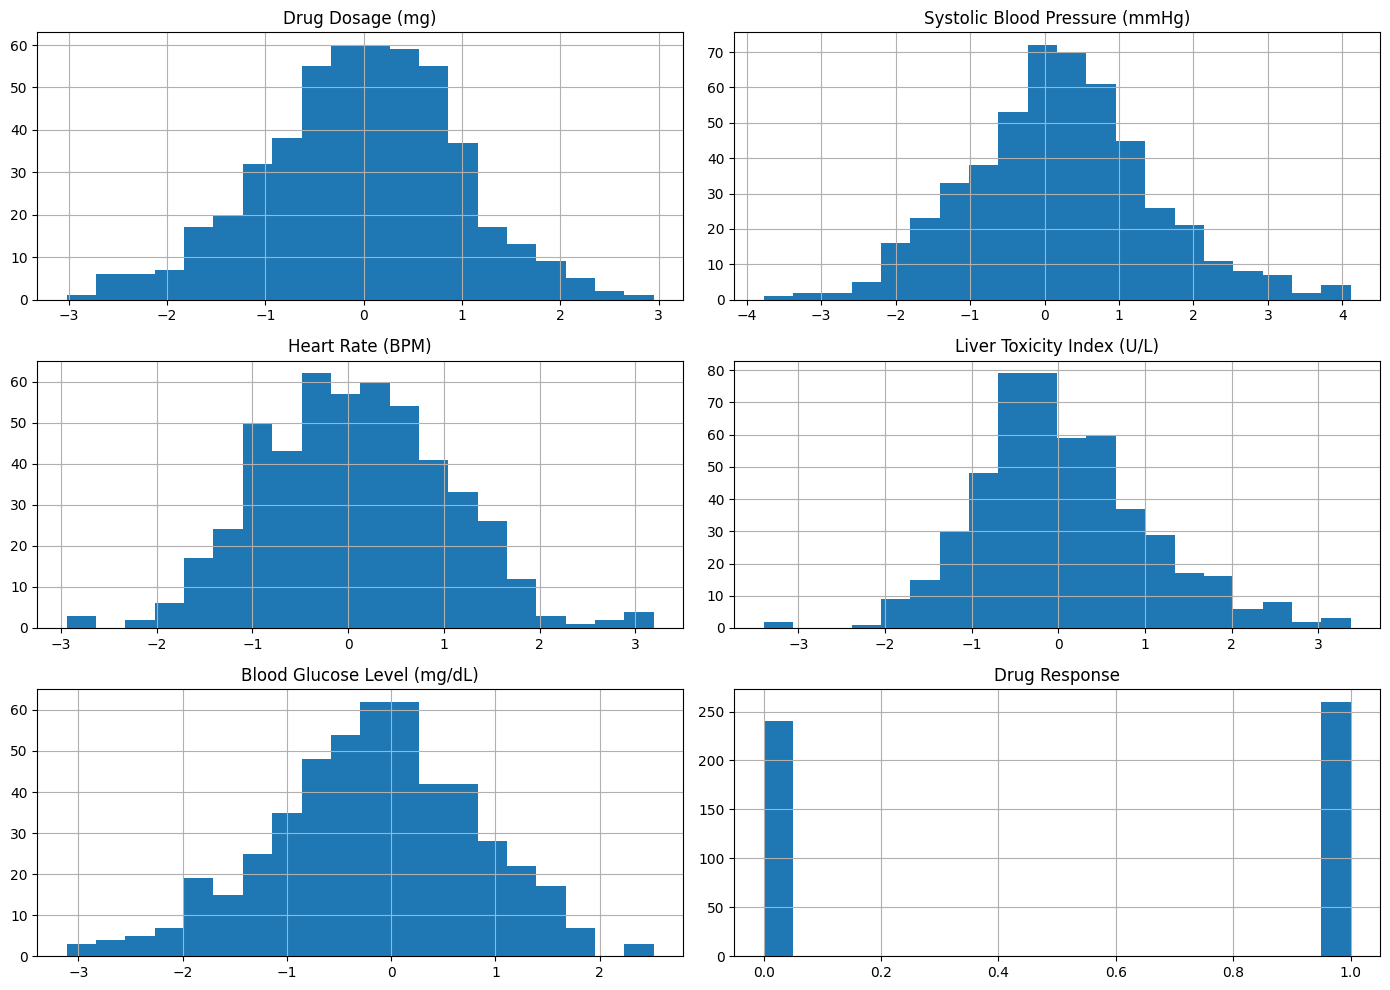

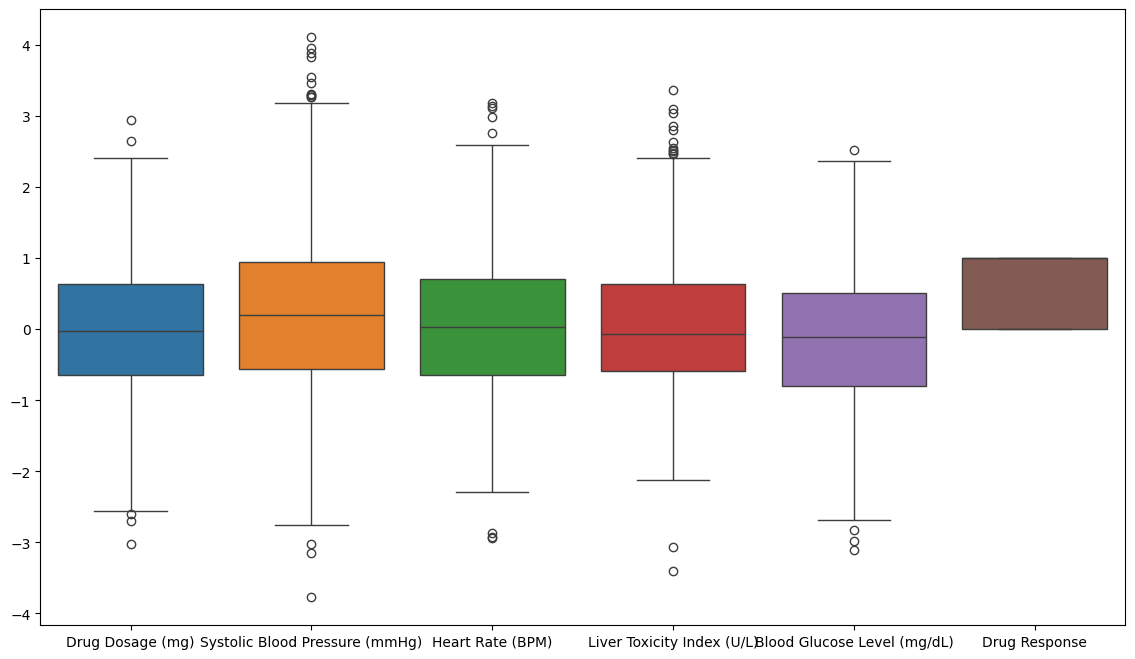

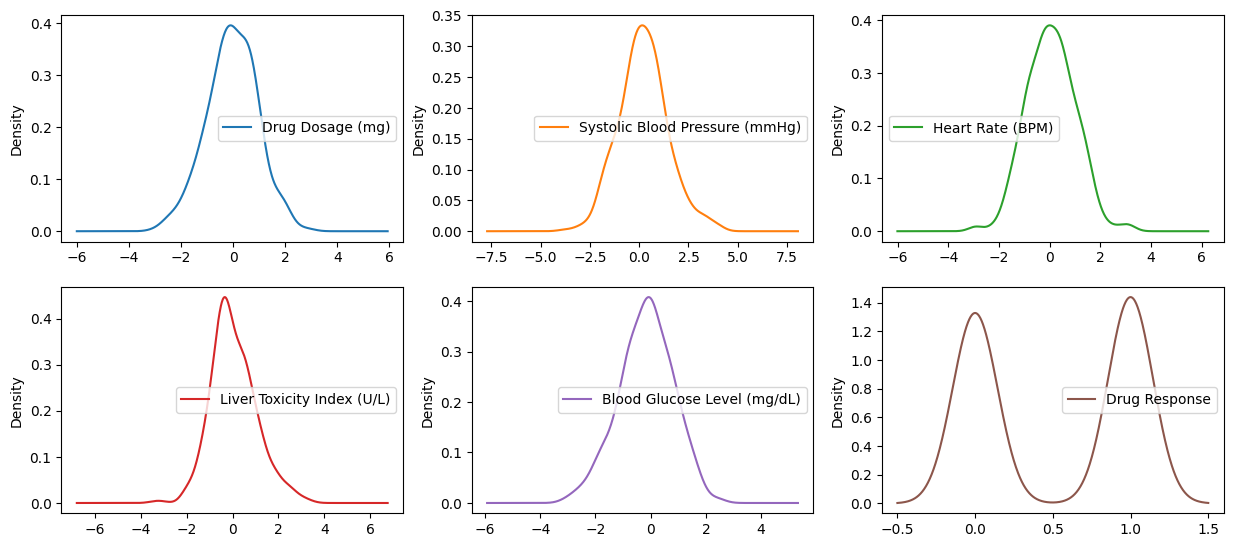

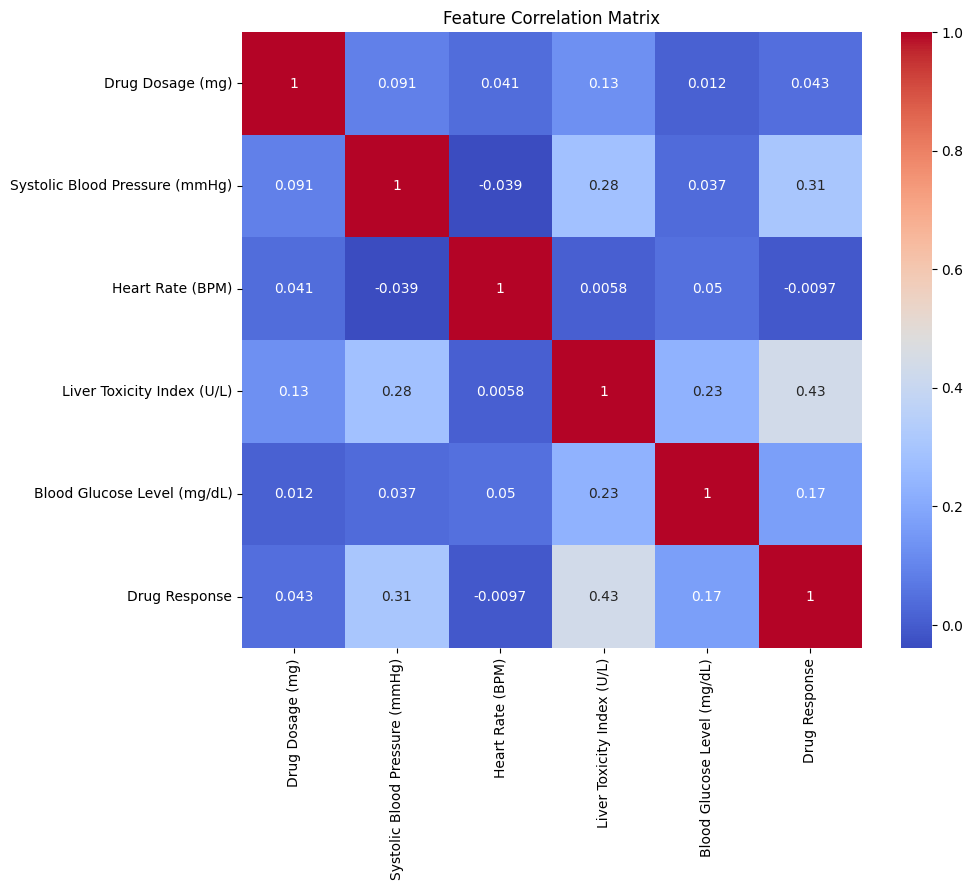

In [5]:
# Histograms for numeric features
df.hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()

# Box plots for outlier detection
plt.figure(figsize=(14, 8))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.show()

# Density plots for feature distribution
df.select_dtypes(include='number').plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(15,10))
plt.show()

# Correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Data Preprocessing

In [8]:
# Encode categorical variables if present
if df.select_dtypes(include='object').shape[1] > 0:
    for col in df.select_dtypes(include='object').columns:
        df[col] = LabelEncoder().fit_transform(df[col])

# Define features and target variable
X = df.drop('Drug Response', axis=1)    # Replace 'Response' with actual target column if needed
y = df['Drug Response']

# Split into training and testing s|ets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Data Visualization

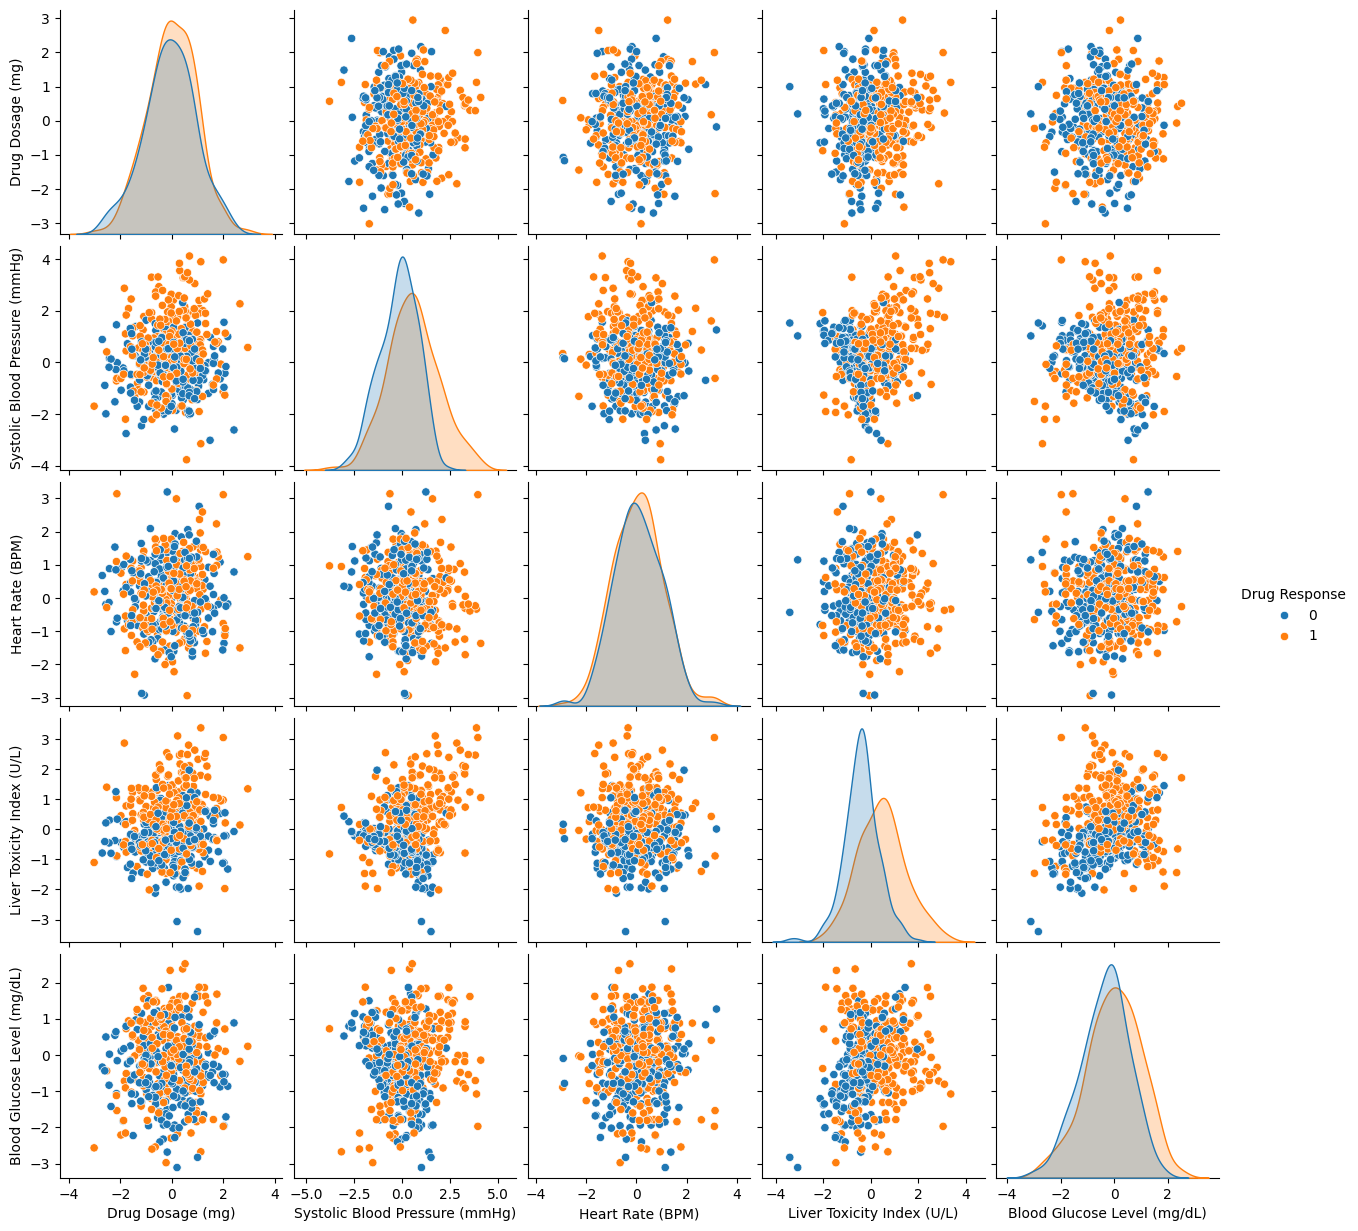

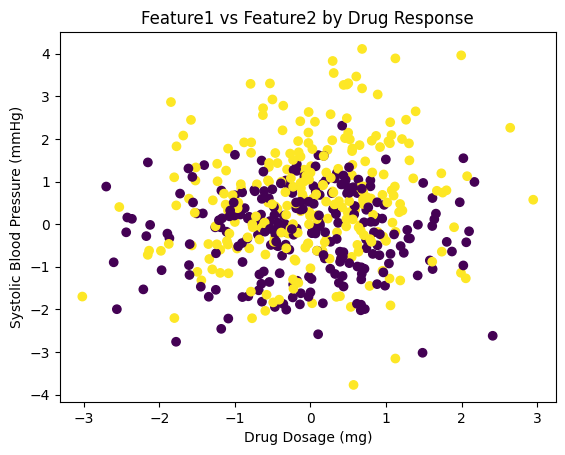

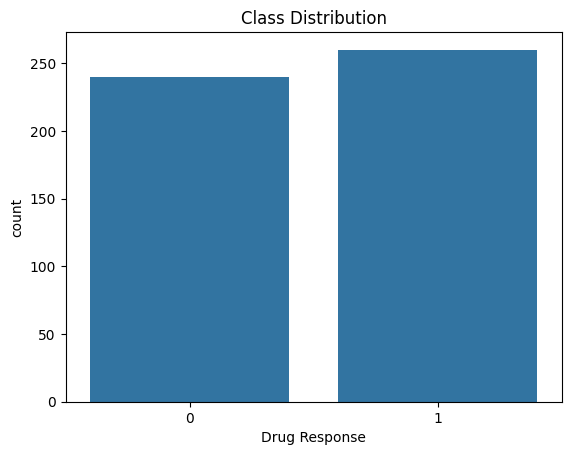

In [12]:
# Pair plot to observe feature relationships by class
sns.pairplot(df, hue='Drug Response')   # Replace 'Response' if target is named differently
plt.show()

# Scatter plot of two features (replace with relevant column names)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Drug Response'], cmap='viridis')
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('Feature1 vs Feature2 by Drug Response')
plt.show()

# Class distribution
sns.countplot(x='Drug Response', data=df)
plt.title('Class Distribution')
plt.show()

# SVM Implementation

In [13]:
# Train a basic SVM
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = svm_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



# Visualization of SVM Results

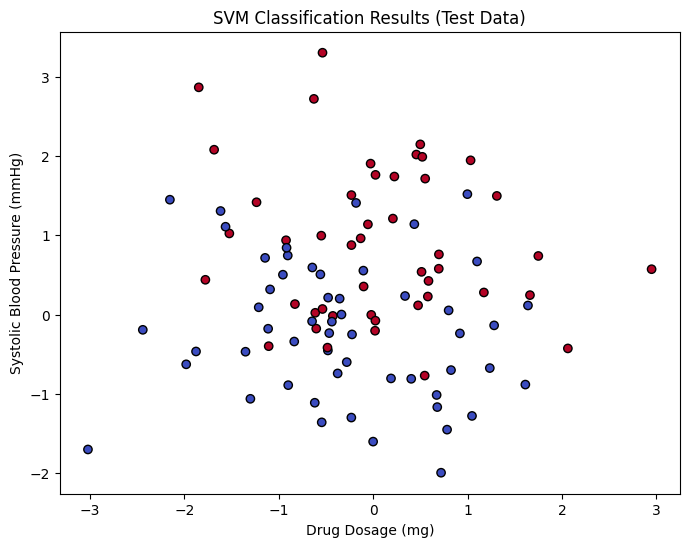

In [14]:
# Visualize results (using the first two features for 2D)
plt.figure(figsize=(8,6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.xlabel(X_test.columns[0])
plt.ylabel(X_test.columns[1])
plt.title('SVM Classification Results (Test Data)')
plt.show()


# Parameter Tuning and Optimization

In [15]:
# Hyperparameter tuning using grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate best model on test set
y_pred_tuned = grid.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))


Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.7775000000000001
Tuned Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        48
           1       0.71      0.77      0.74        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



# Comparison and Analysis

In [16]:
# Compare accuracy for different kernels
results = []
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    clf = SVC(kernel=kernel, C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
    clf.fit(X_train, y_train)
    y_pred_kernel = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred_kernel)
    results.append({'Kernel': kernel, 'Accuracy': acc})

# Display comparison
results_df = pd.DataFrame(results)
print(results_df)


   Kernel  Accuracy
0  linear      0.72
1    poly      0.62
2     rbf      0.72


# Summary
1. Exploratory Data Analysis (EDA)
The dataset is loaded and explored to understand its structure, feature distributions, and relationships. Visualizations like histograms, box plots, and density plots reveal the spread and outliers in the data, while a correlation matrix helps identify relationships between features. This step ensures familiarity with the data and highlights any potential issues such as missing values or imbalanced classes.

2. Data Preprocessing
Categorical variables are encoded into numeric form to make them suitable for SVM modeling. The dataset is then split into training and testing sets, ensuring that the model is evaluated on unseen data. This step is crucial for preventing data leakage and ensuring fair model assessment.

3. Data Visualization
Pair plots, scatter plots, and class distribution plots are used to visualize feature relationships and the balance of target classes. These visualizations help in understanding how well the classes are separated and whether the dataset is balanced, which can impact model performance.

4. SVM Implementation
A basic SVM classifier is trained on the training data. The model is then evaluated on the test set using metrics such as accuracy, precision, recall, and F1-score. This provides an initial benchmark for model performance and helps identify areas for improvement.

5. Visualization of SVM Results
The classification results are visualized, typically using scatter plots of the test data colored by predicted class. This helps in visually assessing how well the SVM has separated the classes, especially in lower-dimensional projections.

6. Parameter Tuning and Optimization
Hyperparameters such as the kernel type, regularization parameter (C), and gamma are tuned using grid search and cross-validation. This step aims to find the best combination of parameters to maximize model performance and generalizability.

7. Comparison and Analysis
The performance of SVM with different kernels (linear, polynomial, RBF) is compared. The strengths and weaknesses of SVM for the dataset are discussed, including its ability to handle high-dimensional data and its sensitivity to parameter choices. The practical implications of using SVM in real-world classification tasks are also considered, such as its robustness and scalability.